# Artificial Neural Network (ANN) Model with PyTorch for FFT Features Dataset

This notebook builds an Artificial Neural Network (ANN) model using PyTorch and the FFT features dataset from the Raw_data directory. It includes:

1. Data loading and exploration
2. Data preprocessing and normalization
3. Data splitting (60% training, 20% validation, 20% test) with random shuffling
4. Feature selection interface
5. PyTorch neural network model building with customizable parameters
6. Model training and evaluation
7. Performance visualization

## Import Required Libraries

Import the necessary libraries for data processing, PyTorch neural network modeling, and visualization.

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np
import os

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Interactive widgets for feature selection
import ipywidgets as widgets
from IPython.display import display

# Set plotting styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# For reproducibility
np.random.seed(42)
torch.manual_seed(42)

#use apple metal 
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
# Print the device being used
print(f"Using device: {device}")

Using device: mps


## Load and Explore the Dataset

Load the FFT features dataset from the Raw_data directory and explore its structure.

In [2]:
# Define the path to the FFT features dataset
file_path = '/Users/vedantgupta/Documents/project /DEP-1/data/Raw_data/fft_features_dataset.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    # Create a sample dataset for demonstration if the file is not found
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 200
    window_ids = np.arange(n_samples)
    features = {f'feature_{i}': np.random.normal(0, 1, n_samples) + i * np.sin(window_ids/10) for i in range(1, 11)}
    features['window_id'] = window_ids
    # Add a label column for classification
    features['label'] = np.random.randint(0, 3, n_samples)
    df = pd.DataFrame(features)
    print(f"Sample dataset created with shape: {df.shape}")

Dataset loaded successfully with shape: (2792, 37)


First 5 rows of the dataset:


,fft_total_energy,fft_spectral_kurtosis,fft_spectral_skewness,fft_spectral_entropy,fft_peak_freq,fft_peak_amplitude,fft_bpfo_1x_energy,fft_bpfo_1x_peak,fft_bpfo_2x_energy,fft_bpfo_2x_peak,...,cur_bpfo_3x_peak,cur_bpfo_1x_upper_sideband,cur_bpfo_1x_lower_sideband,cur_bpfo_harmonic_ratio,cur_spectral_centroid,vib_cur_coherence,window_id,op_freq,BPFO,label
0,0.014995,342.624687,18.090283,4.694671,0.0,0.108815,7.228981e-07,0.000522,2.234853e-06,0.000879,...,0.130098,0.010411,0.056649,0.151708,987.250669,0.263249,0,20,55.478927,0
1,0.015267,342.272195,18.079856,4.654710,0.0,0.109795,1.037048e-06,0.000453,2.603617e-06,0.001005,...,0.129736,0.006357,0.036215,0.149443,928.036659,0.344890,1,20,55.478927,0
2,0.015125,342.920462,18.097394,4.723438,0.0,0.109293,1.068530e-06,0.000636,1.761568e-06,0.000613,...,0.116732,0.013051,0.066224,0.153472,1040.339770,0.297090,2,20,55.478927,0
3,0.014857,343.150759,18.105364,4.671007,0.0,0.108391,2.700607e-06,0.000783,1.570791e-06,0.000807,...,0.137694,0.018121,0.104149,0.188753,1021.711818,0.250239,3,20,55.478927,0
4,0.015114,342.541083,18.087168,4.629760,0.0,0.109290,9.345048e-07,0.000651,5.874055e-07,0.000519,...,0.120735,0.020045,0.120505,0.194232,1039.540433,0.232888,4,20,55.478927,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fft_total_energy            2792 non-null   float64
 1   fft_spectral_kurtosis       2792 non-null   float64
 2   fft_spectral_skewness       2792 non-null   float64
 3   fft_spectral_entropy        2792 non-null   float64
 4   fft_peak_freq               2792 non-null   float64
 5   fft_peak_amplitude          2792 non-null   float64
 6   fft_bpfo_1x_energy          2792 non-null   float64
 7   fft_bpfo_1x_peak            2792 non-null   float64
 8   fft_bpfo_2x_energy          2792 non-null   float64
 9   fft_bpfo_2x_peak            2792 non-null   float64
 10  fft_bpfo_3x_energy          2792 non-null   float64
 11  fft_bpfo_3x_peak            2792 non-null   float64
 12  fft_bpfo_1x_upper_sideband  2792 non-null   float64
 13  fft_bpfo_1x

None


Missing values in the dataset:


fft_total_energy              0
fft_spectral_kurtosis         0
fft_spectral_skewness         0
fft_spectral_entropy          0
fft_peak_freq                 0
fft_peak_amplitude            0
fft_bpfo_1x_energy            0
fft_bpfo_1x_peak              0
fft_bpfo_2x_energy            0
fft_bpfo_2x_peak              0
fft_bpfo_3x_energy            0
fft_bpfo_3x_peak              0
fft_bpfo_1x_upper_sideband    0
fft_bpfo_1x_lower_sideband    0
fft_bpfo_harmonic_ratio       0
fft_spectral_centroid         0
cur_total_energy              0
cur_spectral_kurtosis         0
cur_spectral_skewness         0
cur_spectral_entropy          0
cur_peak_freq                 0
cur_peak_amplitude            0
cur_bpfo_1x_energy            0
cur_bpfo_1x_peak              0
cur_bpfo_2x_energy            0
cur_bpfo_2x_peak              0
cur_bpfo_3x_energy            0
cur_bpfo_3x_peak              0
cur_bpfo_1x_upper_sideband    0
cur_bpfo_1x_lower_sideband    0
cur_bpfo_harmonic_ratio       0
cur_spec


Basic statistics:


,fft_total_energy,fft_spectral_kurtosis,fft_spectral_skewness,fft_spectral_entropy,fft_peak_freq,fft_peak_amplitude,fft_bpfo_1x_energy,fft_bpfo_1x_peak,fft_bpfo_2x_energy,fft_bpfo_2x_peak,...,cur_bpfo_3x_peak,cur_bpfo_1x_upper_sideband,cur_bpfo_1x_lower_sideband,cur_bpfo_harmonic_ratio,cur_spectral_centroid,vib_cur_coherence,window_id,op_freq,BPFO,label
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.0,2792.000000,2.792000e+03,2792.000000,2.792000e+03,2792.000000,...,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.0000,2792.000000,2792.000000,2792.00000
mean,0.027710,339.939834,17.977223,4.958092,0.0,0.143229,1.266898e-05,0.001862,1.468516e-05,0.001886,...,0.145489,0.014683,0.297987,0.095571,946.278007,0.124409,1395.5000,27.500000,76.283525,0.50000
std,0.011633,3.063089,0.120740,0.286626,0.0,0.030543,1.453897e-05,0.001409,1.876124e-05,0.001482,...,0.198179,0.027505,0.210198,0.080226,105.087835,0.060938,806.1253,5.591171,15.509609,0.50009
min,0.013998,329.938081,17.637858,4.413572,0.0,0.105274,1.898596e-07,0.000228,1.308771e-07,0.000204,...,0.004878,0.000042,0.016652,0.000141,772.918722,0.016882,0.0000,20.000000,55.478927,0.00000
25%,0.016074,337.335230,17.869816,4.678023,0.0,0.112684,1.335768e-06,0.000657,1.545953e-06,0.000715,...,0.023167,0.000471,0.117375,0.028959,844.060068,0.071078,697.7500,23.750000,65.881226,0.00000
50%,0.027324,340.807936,18.021694,4.972106,0.0,0.144093,3.723791e-06,0.001172,4.153448e-06,0.001200,...,0.052068,0.001026,0.236918,0.062344,915.536189,0.111647,1395.5000,27.500000,76.283525,0.50000
75%,0.039316,342.682989,18.090438,5.240967,0.0,0.173676,2.117723e-05,0.002935,2.143827e-05,0.002709,...,0.175872,0.008553,0.481420,0.185259,1056.887578,0.174195,2093.2500,31.250000,86.685824,1.00000
max,0.042845,345.123374,18.153828,5.361321,0.0,0.181421,1.127561e-04,0.007264,1.042674e-04,0.007542,...,0.693436,0.220881,0.744812,0.250326,1121.710932,0.344890,2791.0000,35.000000,97.088123,1.00000



Label distribution:


label
0    1396
1    1396
Name: count, dtype: int64

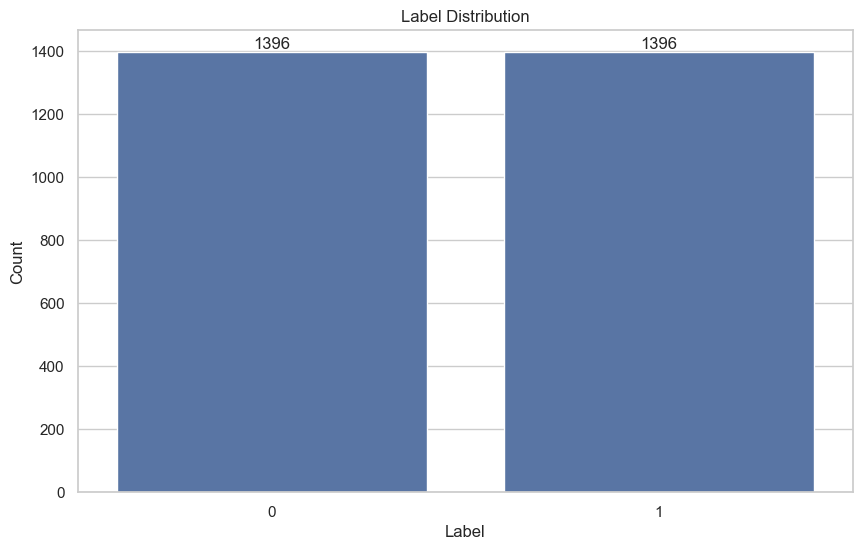

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Display dataset information
print("\nDataset information:")
display(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
display(df.describe())

# Check for the label column
if 'label' in df.columns:
    print("\nLabel distribution:")
    display(df['label'].value_counts())
    
    # Visualize label distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='label', data=df)
    for i in ax.containers:
        ax.bar_label(i)
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nWarning: No 'label' column found in the dataset. A label column is required for classification.")

## Preprocess Data for PyTorch Neural Network

Preprocess the data, including feature scaling, encoding of labels, and splitting into training, validation, and test sets.

In [4]:
def prepare_data_for_pytorch(df):
    """Prepare the dataset for PyTorch neural network modeling by preprocessing and splitting it."""
    
    # Check if we have a label column for classification
    if 'label' not in df.columns:
        print("Error: No 'label' column found in the dataset. A label column is required for classification.")
        return None, None, None, None, None, None, None, None, None, None
    
    # Identify features and target
    X = df.drop(['label'], axis=1)
    
    # If window_id doesn't add predictive value, we can drop it
    if 'window_id' in X.columns:
        X = X.drop(['window_id'], axis=1)
    
    # Store original feature names for later
    feature_names = X.columns.tolist()
    
    # Convert features to numpy array
    X = X.values
    
    # Normalize/standardize the features (important for neural networks)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Get target variable
    y = df['label'].values
    
    # Check if the labels are already numeric
    if isinstance(y[0], (str, bool)):
        # Encode categorical labels to numbers
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        class_names = label_encoder.classes_
    else:
        y_encoded = y
        class_names = np.unique(y)
    
    # Count the number of unique classes
    num_classes = len(np.unique(y_encoded))
    print(f"Number of classes: {num_classes}")
    
    # For PyTorch, we'll keep the labels as integers and use CrossEntropyLoss
    y_final = y_encoded
    
    # Split into train, validation, and test sets (60%, 20%, 20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_scaled, y_final, test_size=0.2, random_state=42, stratify=y_encoded
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
    )
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    X_val_tensor = torch.FloatTensor(X_val)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.LongTensor(y_train)
    y_val_tensor = torch.LongTensor(y_val)
    y_test_tensor = torch.LongTensor(y_test)
    
    print(f"Data split complete:")
    print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.1%})")
    print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df):.1%})")
    print(f"  Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.1%})")
    print(f"  Feature dimensionality: {X_train.shape[1]}")
    
    return X_train_tensor, X_val_tensor, X_test_tensor, y_train_tensor, y_val_tensor, y_test_tensor, feature_names, scaler, num_classes, class_names

# Prepare the data
X_train, X_val, X_test, y_train, y_val, y_test, feature_names, scaler, num_classes, class_names = prepare_data_for_pytorch(df)

# Check if data preparation was successful
if X_train is not None:
    print("\nData successfully prepared for PyTorch neural network training.")
    print(f"Input shape: {X_train.shape[1]} features")
    print(f"Number of classes: {num_classes}")
    print(f"Class names: {class_names}")

Number of classes: 2
Data split complete:
  Training set: 1674 samples (60.0%)
  Validation set: 559 samples (20.0%)
  Test set: 559 samples (20.0%)
  Feature dimensionality: 35

Data successfully prepared for PyTorch neural network training.
Input shape: 35 features
Number of classes: 2
Class names: [0 1]


## Feature Selection Interface

Create an interactive interface to select which features to use for model training.

In [5]:
def create_feature_selector(feature_names):
    """Create interactive widgets for selecting features."""
    if feature_names is None:
        print("No feature names available. Cannot create feature selector.")
        return None, None
    
    # Create checkboxes for each feature
    feature_checkboxes = [widgets.Checkbox(value=True, description=f"{i+1}: {name}") 
                          for i, name in enumerate(feature_names)]
    
    # Create buttons for selecting/deselecting all features
    select_all_button = widgets.Button(description="Select All")
    deselect_all_button = widgets.Button(description="Deselect All")
    select_by_corr_button = widgets.Button(description="Select Top 10 by Correlation")
    
    # Define button callbacks
    def select_all(b):
        for checkbox in feature_checkboxes:
            checkbox.value = True
    
    def deselect_all(b):
        for checkbox in feature_checkboxes:
            checkbox.value = False
    
    def select_by_correlation(b):
        # First deselect all
        for checkbox in feature_checkboxes:
            checkbox.value = False
        
        # Try to get correlation values with label
        try:
            corr_values = df[feature_names].corrwith(df['label']).abs().sort_values(ascending=False)
            top_features = corr_values.head(10).index.tolist()  # Take top 10 for neural network
            
            # Select top features by correlation with label
            for checkbox in feature_checkboxes:
                feature_name = checkbox.description.split(": ")[1]
                if feature_name in top_features:
                    checkbox.value = True
            
            print(f"Selected top 10 features by correlation with label: {', '.join(top_features)}")
        except Exception as e:
            print(f"Error selecting by correlation: {e}")
            # If there's an error, just select the first 10 features
            for i, checkbox in enumerate(feature_checkboxes):
                if i < 10:
                    checkbox.value = True
    
    # Attach callbacks to buttons
    select_all_button.on_click(select_all)
    deselect_all_button.on_click(deselect_all)
    select_by_corr_button.on_click(select_by_correlation)
    
    # Create layout for the feature selection UI
    button_box = widgets.HBox([select_all_button, deselect_all_button, select_by_corr_button])
    checkbox_box = widgets.VBox(feature_checkboxes)
    feature_selector = widgets.VBox([
        widgets.HTML(value="<h3>Select features to include in the neural network model:</h3>"),
        button_box,
        checkbox_box
    ])
    
    return feature_selector, feature_checkboxes

# Create neural network parameter widgets
hidden_layers_widget = widgets.IntSlider(
    value=2, min=1, max=5, step=1,
    description='Hidden Layers:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

neurons_per_layer_widget = widgets.IntSlider(
    value=64, min=8, max=256, step=8,
    description='Neurons per Layer:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

dropout_rate_widget = widgets.FloatSlider(
    value=0.2, min=0.0, max=0.5, step=0.05,
    description='Dropout Rate:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

learning_rate_widget = widgets.FloatLogSlider(
    value=0.001, base=10, min=-4, max=-2, step=0.2,
    description='Learning Rate:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

batch_size_widget = widgets.IntSlider(
    value=32, min=8, max=128, step=8,
    description='Batch Size:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

epochs_widget = widgets.IntSlider(
    value=50, min=10, max=200, step=10,
    description='Max Epochs:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

activation_widget = widgets.Dropdown(
    options=['relu', 'elu', 'tanh', 'sigmoid'],
    value='relu',
    description='Activation:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='500px')
)

# Create the feature selector if features are available
if feature_names:
    feature_selector, feature_checkboxes = create_feature_selector(feature_names)
    display(widgets.VBox([
        feature_selector,
        widgets.HTML(value="<h3>Neural Network Parameters:</h3>"),
        hidden_layers_widget,
        neurons_per_layer_widget,
        activation_widget,
        dropout_rate_widget,
        learning_rate_widget,
        batch_size_widget,
        epochs_widget
    ]))

## Define the PyTorch Neural Network Model

Define a PyTorch neural network model class with customizable architecture.

In [6]:
class NeuralNetwork(nn.Module):
    """PyTorch neural network model with customizable architecture."""
    
    def __init__(self, input_dim, hidden_layers, neurons_per_layer, dropout_rate, activation_func, num_classes):
        super(NeuralNetwork, self).__init__()
        
        # Map activation function string to PyTorch activation function
        activation_map = {
            'relu': nn.ReLU(),
            'elu': nn.ELU(),
            'tanh': nn.Tanh(),
            'sigmoid': nn.Sigmoid()
        }
        activation = activation_map[activation_func]
        
        # Create list to hold all layers
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_dim, neurons_per_layer))
        layers.append(nn.BatchNorm1d(neurons_per_layer))
        layers.append(activation)
        layers.append(nn.Dropout(dropout_rate))
        
        # Hidden layers
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(neurons_per_layer, neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(activation)
            layers.append(nn.Dropout(dropout_rate))
        
        # Output layer
        layers.append(nn.Linear(neurons_per_layer, num_classes))
        
        # Create sequential model with all layers
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

## Train the Neural Network Model

Create a function to train the PyTorch neural network model with selected features and parameters.

In [7]:
def train_pytorch_network(feature_checkboxes, hidden_layers, neurons_per_layer, activation,
                          dropout_rate, learning_rate, batch_size, epochs):
    """Train a PyTorch neural network model with the selected features and parameters."""
    if X_train is None or y_train is None:
        print("Error: Training data not available.")
        return None, None, None
    
    # Get selected feature indices
    selected_indices = []
    selected_features = []
    
    for i, checkbox in enumerate(feature_checkboxes):
        if checkbox.value:
            selected_indices.append(i)
            feature_name = checkbox.description.split(": ")[1]
            selected_features.append(feature_name)
    
    if not selected_indices:
        print("Error: No features selected. Please select at least one feature.")
        return None, None, None
    
    print(f"\nTraining neural network with {len(selected_indices)} selected features:")
    for i, feature in enumerate(selected_features):
        print(f"  {i+1}. {feature}")
    
    # Select the features
    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_selected, y_train)
    val_dataset = TensorDataset(X_val_selected, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Initialize the model
    input_dim = len(selected_indices)
    model = NeuralNetwork(
        input_dim=input_dim,
        hidden_layers=hidden_layers,
        neurons_per_layer=neurons_per_layer,
        dropout_rate=dropout_rate,
        activation_func=activation,
        num_classes=num_classes
    ).to(device)
    
    # Display model structure
    print("\nModel Structure:")
    print(model)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # LR scheduler for reducing learning rate when validation loss plateaus
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)
    
    # Initialize variables to track training process
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_loss = float('inf')
    early_stopping_counter = 0
    early_stopping_patience = 15
    best_model_state = None
    
    # Training loop
    print("\nStarting training...")
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_train_loss = running_loss / len(train_dataset)
        epoch_train_acc = correct / total
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        epoch_val_loss = running_loss / len(val_dataset)
        epoch_val_acc = correct / total
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)
        
        # Update learning rate based on validation loss
        scheduler.step(epoch_val_loss)
        
        # Print progress
        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}: "
                  f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
                  f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")
        
        # Save best model
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_state = model.state_dict().copy()
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
        
        # Early stopping
        if early_stopping_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    print("\nTraining complete.")
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training')
    plt.plot(val_losses, label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training')
    plt.plot(val_accuracies, label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_selected.to(device))
        _, predicted = torch.max(outputs, 1)
        test_accuracy = (predicted == y_test.to(device)).sum().item() / len(y_test)
    
    print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
    
    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }, selected_indices

# Create a button to train the model
train_button = widgets.Button(
    description="Train Neural Network",
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the train button
output = widgets.Output()

@output.capture()
def on_train_button_clicked(b):
    if 'feature_checkboxes' not in globals():
        print("Error: Feature checkboxes not initialized.")
        return
    
    model, history, selected_indices = train_pytorch_network(
        feature_checkboxes,
        hidden_layers_widget.value,
        neurons_per_layer_widget.value,
        activation_widget.value,
        dropout_rate_widget.value,
        learning_rate_widget.value,
        batch_size_widget.value,
        epochs_widget.value
    )
    
    if model is not None:
        # Store the model and selected indices as global variables for later use
        global pytorch_model, pytorch_history, pytorch_selected_indices
        pytorch_model = model
        pytorch_history = history
        pytorch_selected_indices = selected_indices

# Connect the callback to the button
train_button.on_click(on_train_button_clicked)

# Display the button and output area
display(train_button)
display(output)

Button(button_style='success', description='Train Neural Network', layout=Layout(height='40px', width='200px')…

Output()

## Evaluate the Neural Network Model on the Test Set

Evaluate the trained PyTorch neural network model on the test set and display detailed metrics.

In [8]:
def evaluate_pytorch_model():
    """Evaluate the trained PyTorch neural network on the test set"""
    if 'pytorch_model' not in globals() or 'pytorch_selected_indices' not in globals():
        print("Error: No trained model available. Please train a model first.")
        return
    
    # Get the trained model and selected indices
    model = pytorch_model
    selected_indices = pytorch_selected_indices
    
    # Select the features from the test set
    X_test_selected = X_test[:, selected_indices].to(device)
    y_test_cpu = y_test.clone().cpu()
    
    # Set model to evaluation mode
    model.eval()
    
    # Get predictions
    with torch.no_grad():
        outputs = model(X_test_selected)
        _, predicted = torch.max(outputs, 1)
        predicted_cpu = predicted.cpu()
        test_accuracy = (predicted.cpu() == y_test_cpu).sum().item() / len(y_test_cpu)
    
    print(f"Neural Network Evaluation on Test Set:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Classification report
    print("\nTest Set Classification Report:")
    print(classification_report(y_test_cpu, predicted_cpu))
    
    # Confusion matrix
    print("\nTest Set Confusion Matrix:")
    cm = confusion_matrix(y_test_cpu, predicted_cpu)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Test Set)')
    plt.show()
    
    # If multi-class, visualize class-wise performance
    if num_classes > 2:
        # Compute per-class accuracy
        per_class_accuracy = []
        for i in range(num_classes):
            class_indices = (y_test_cpu == i)
            if class_indices.sum().item() > 0:  # Avoid division by zero
                accuracy = (predicted_cpu[class_indices] == i).sum().item() / class_indices.sum().item()
                per_class_accuracy.append(accuracy)
            else:
                per_class_accuracy.append(0)
        
        # Plot per-class accuracy
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(range(num_classes)), y=per_class_accuracy)
        plt.xlabel('Class')
        plt.ylabel('Accuracy')
        plt.title('Per-Class Accuracy')
        plt.ylim(0, 1.0)
        plt.show()

# Create a button to evaluate the model
eval_button = widgets.Button(
    description="Evaluate Neural Network",
    button_style='info',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the evaluation button
eval_output = widgets.Output()

@eval_output.capture()
def on_eval_button_clicked(b):
    evaluate_pytorch_model()

# Connect the callback to the button
eval_button.on_click(on_eval_button_clicked)

# Display the button and output area
display(eval_button)
display(eval_output)

Button(button_style='info', description='Evaluate Neural Network', layout=Layout(height='40px', width='200px')…

Output()

## Save the Trained Model

Save the trained PyTorch neural network model and selected features for later use.

In [9]:
def save_pytorch_model():
    """Save the trained PyTorch neural network model and selected features"""
    if 'pytorch_model' not in globals() or 'pytorch_selected_indices' not in globals():
        print("Error: No trained model available. Please train a model first.")
        return
    
    # Create a directory for models if it doesn't exist
    model_dir = os.path.join(os.path.dirname(file_path), 'models')
    os.makedirs(model_dir, exist_ok=True)
    
    # Save the model
    model_path = os.path.join(model_dir, 'pytorch_neural_network.pt')
    torch.save(pytorch_model.state_dict(), model_path)
    
    # Save the selected feature indices
    features_path = os.path.join(model_dir, 'pytorch_selected_features.txt')
    selected_features = [feature_names[i] for i in pytorch_selected_indices]
    with open(features_path, 'w') as f:
        f.write('\n'.join(selected_features))
    
    # Save the scaler for later use
    scaler_path = os.path.join(model_dir, 'pytorch_scaler.joblib')
    import joblib
    joblib.dump(scaler, scaler_path)
    
    # Save model architecture parameters for later reconstruction
    model_config = {
        'input_dim': len(pytorch_selected_indices),
        'hidden_layers': hidden_layers_widget.value,
        'neurons_per_layer': neurons_per_layer_widget.value,
        'dropout_rate': dropout_rate_widget.value,
        'activation_func': activation_widget.value,
        'num_classes': num_classes
    }
    
    config_path = os.path.join(model_dir, 'pytorch_model_config.joblib')
    joblib.dump(model_config, config_path)
    
    print(f"PyTorch model saved to: {model_path}")
    print(f"Selected features saved to: {features_path}")
    print(f"Feature scaler saved to: {scaler_path}")
    print(f"Model configuration saved to: {config_path}")
    print("\nTo load the model later, use:")
    print("```python")
    print("import torch")
    print("import joblib")
    print("from torch import nn")
    print("")
    print("# Load model configuration")
    print("config = joblib.load('path/to/pytorch_model_config.joblib')")
    print("")
    print("# Recreate the model architecture")
    print("model = NeuralNetwork(**config)")
    print("")
    print("# Load the saved weights")
    print("model.load_state_dict(torch.load('path/to/pytorch_neural_network.pt'))")
    print("model.eval()  # Set to evaluation mode")
    print("```")

# Create a button to save the model
save_button = widgets.Button(
    description="Save Neural Network",
    button_style='warning',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the save button
save_output = widgets.Output()

@save_output.capture()
def on_save_button_clicked(b):
    save_pytorch_model()

# Connect the callback to the button
save_button.on_click(on_save_button_clicked)

# Display the button and output area
display(save_button)
display(save_output)

Button(button_style='warning', description='Save Neural Network', layout=Layout(height='40px', width='200px'),…

Output()

## Compare with Simple Baseline Models

Compare the PyTorch neural network with simple baseline models to assess the value of the neural network approach.

In [10]:
def create_baseline_models():
    """Create simple baseline models for comparison"""
    if 'pytorch_selected_indices' not in globals() or 'pytorch_model' not in globals():
        print("Error: Neural network not trained yet. Please train a neural network first.")
        return
    
    # Get selected features
    selected_indices = pytorch_selected_indices
    X_train_np = X_train[:, selected_indices].numpy()
    X_test_np = X_test[:, selected_indices].numpy()
    y_train_np = y_train.numpy()
    y_test_np = y_test.numpy()
    
    print("Creating baseline models for comparison...")
    
    # 1. Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_model.fit(X_train_np, y_train_np)
    dt_score = dt_model.score(X_test_np, y_test_np)
    
    # 2. Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_np, y_train_np)
    rf_score = rf_model.score(X_test_np, y_test_np)
    
    # 3. Support Vector Machine
    from sklearn.svm import SVC
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_np, y_train_np)
    svm_score = svm_model.score(X_test_np, y_test_np)
    
    # 4. Neural Network (already trained)
    pytorch_model.eval()
    with torch.no_grad():
        outputs = pytorch_model(X_test[:, selected_indices].to(device))
        _, predicted = torch.max(outputs, 1)
        nn_score = (predicted.cpu() == y_test).sum().item() / len(y_test)
    
    # Compare models
    print("\nModel Comparison (Test Accuracy):")
    print(f"Decision Tree: {dt_score:.4f}")
    print(f"Random Forest: {rf_score:.4f}")
    print(f"Support Vector Machine: {svm_score:.4f}")
    print(f"PyTorch Neural Network: {nn_score:.4f}")
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    models = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']
    scores = [dt_score, rf_score, svm_score, nn_score]
    
    # Create bar plot
    ax = sns.barplot(x=models, y=scores)
    plt.ylim(max(0, min(scores) - 0.1), min(1.0, max(scores) + 0.1))
    plt.title('Model Comparison')
    plt.ylabel('Test Accuracy')
    
    # Add labels to bars
    for i, score in enumerate(scores):
        ax.text(i, score - 0.05, f"{score:.4f}", ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Create a button to compare models
compare_button = widgets.Button(
    description="Compare with Baselines",
    button_style='primary',
    layout=widgets.Layout(width='200px', height='40px')
)

# Define the callback for the comparison button
compare_output = widgets.Output()

@compare_output.capture()
def on_compare_button_clicked(b):
    create_baseline_models()

# Connect the callback to the button
compare_button.on_click(on_compare_button_clicked)

# Display the button and output area
display(compare_button)
display(compare_output)

Button(button_style='primary', description='Compare with Baselines', layout=Layout(height='40px', width='200px…

Output()

## Conclusion

This notebook provided a complete workflow for building, training, evaluating, and saving a PyTorch neural network model using the FFT features dataset. Key features include:

1. Interactive feature selection to choose which features to use in training
2. Customizable neural network architecture (layers, neurons, activation functions, etc.)
3. Detailed model evaluation with accuracy metrics and visualizations
4. Comparison with baseline models to assess the neural network's performance
5. Data split into training (60%), validation (20%), and test (20%) sets with random shuffling

The PyTorch neural network approach provides a powerful and flexible method for classifying data from the FFT features dataset, potentially capturing complex patterns that simpler models might miss.